In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("..")
from utils.functions import *
from build import morse_complex as mc

In [2]:
data = "../data/roads_labels"
files = os.listdir(data)

In [3]:
img = np.load(data+"/"+files[2])

In [4]:
img.shape

(48, 48)

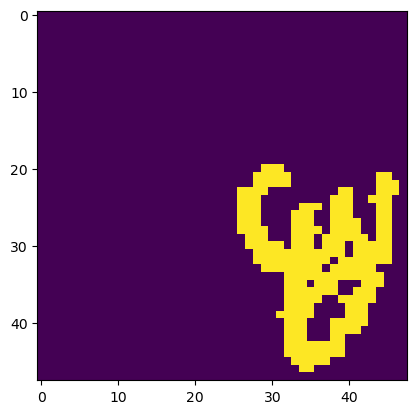

In [5]:
plt.imshow(img)

In [6]:
img2 = np.array([1-img])

In [7]:
img2.shape

(1, 48, 48)

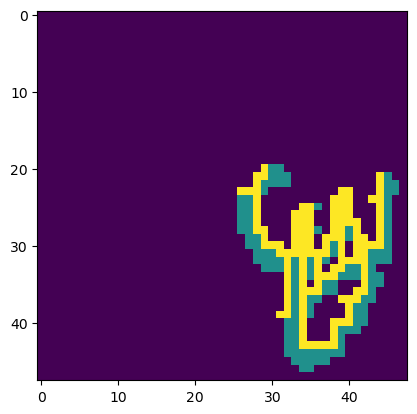

In [8]:
MC = mc.MorseComplex(img2)
MC.process_lower_stars()
MC.extract_morse_skeleton_below(1)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)

[[31, 41, 11, 0], [31, 34, 0, 0], [0, 7, 11, 0]]


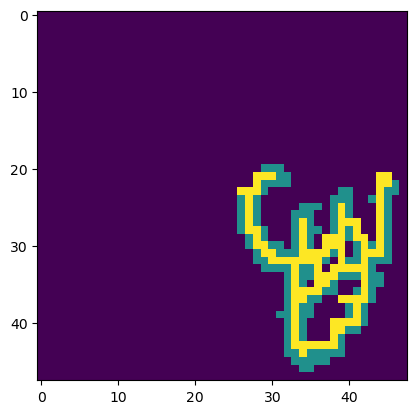

In [9]:
d = distance_transform(img2)
MC = mc.MorseComplex(d)
MC.process_lower_stars()
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

[[1, 11, 11, 0], [1, 4, 0, 0], [0, 7, 11, 0]]
Canceling pairs < 0
Canceling order:

dimension: >
value: >

Critical cells:
total: 1 11 11 0 --- < 0: 1 4 0 0 --- >= 0: 0 7 11 0                       



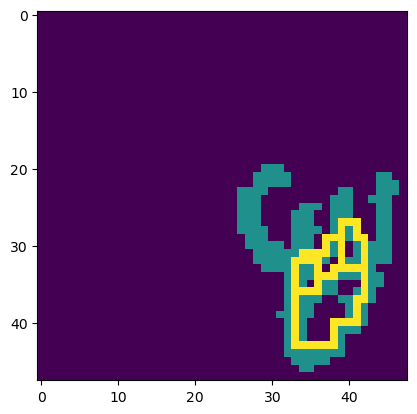

In [10]:
d = distance_transform(img2)
MC = mc.MorseComplex(d)
MC.process_lower_stars()
MC.cancel_pairs_below(0)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

[[1, 11, 11, 0], [1, 4, 0, 0], [0, 7, 11, 0]]


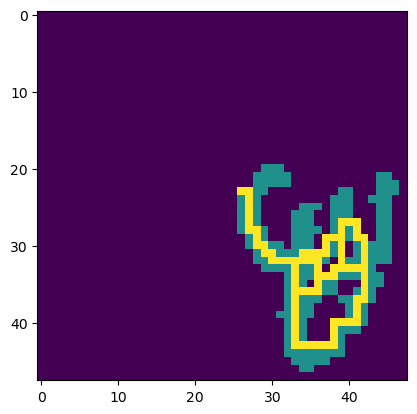

In [11]:
d = distance_transform(img2)
MC = mc.MorseComplex(d)
MC.process_lower_stars()
MC.cancel_low_persistence_pairs_below(0,1)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

[[31, 41, 11, 0], [31, 34, 0, 0], [0, 7, 11, 0]]


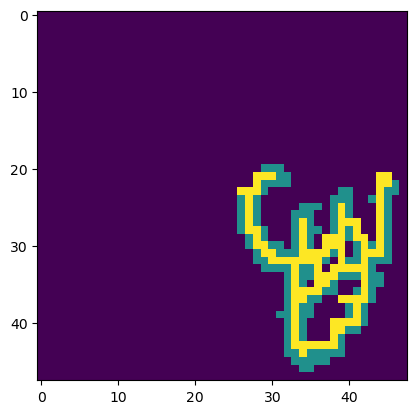

In [13]:
d = distance_transform(img2)
MC = mc.MorseComplex(d)
MC.process_lower_stars()
MC.cancel_boundary_pairs_below(0,0.5)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

In [ ]:
d = distance_transform(img2)
MC = mc.MorseComplex(d)
MC.process_lower_stars()
MC.prepare_and_extract_morse_skeleton_below(0,0.0,[0,1,2,3],1)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

In [ ]:
d = distance_transform(img2)
MC = mc.MorseComplex(d)
MC.process_lower_stars()
MC.cancel_low_persistence_pairs_below(0,2)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

In [ ]:
d_plot = d[0,:,:]
d_plot[d_plot > 0] = 0
plt.imshow(d_plot)

In [ ]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1
plt.imshow(critical+img)

In [ ]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1

m = -np.inf
i = -1
for index,cell in enumerate(cells[0]):
    if cell.birth > m:
        m = cell.birth
        i = index

print(cells[0][i])
coboundary = MC.get_morse_coboundary(cells[0][i])
print(coboundary)
m = np.inf
for b in coboundary:
    if b[1] == 1 and b[0].birth <= 0:
        if b[0].birth < m:
            m = b[0].birth
            pair = b[0]
print(pair)       
j = -1
for index,cell in enumerate(cells[1]):
    if cell.get_voxels() == pair.get_voxels():
        j = index
        break
print(i,j)
print(cells[0][i])
print(cells[1][j])

voxels = cells[0][i].get_voxels()
for voxel in voxels:
    critical[voxel[1],voxel[2]] += 3
voxels = cells[1][j].get_voxels()
for voxel in voxels:
    critical[voxel[1],voxel[2]] += 3

plt.imshow(critical+img)

In [ ]:
MC.cancel_pair(1,j,0,i)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

In [ ]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1

m = -np.inf
i = -1
for index,cell in enumerate(cells[0]):
    if cell.birth > m:
        m = cell.birth
        i = index

print(cells[0][i])
coboundary = MC.get_morse_coboundary(cells[0][i])
print(coboundary)
m = np.inf
for b in coboundary:
    if b[1] == 1 and b[0].birth <= 0:
        if b[0].birth < m:
            m = b[0].birth
            pair = b[0]
print(pair)       
j = -1
for index,cell in enumerate(cells[1]):
    if cell.get_voxels() == pair.get_voxels():
        j = index
        break
print(i,j)
print(cells[0][i])
print(cells[1][j])

voxels = cells[0][i].get_voxels()
for voxel in voxels:
    critical[voxel[1],voxel[2]] += 3
voxels = cells[1][j].get_voxels()
for voxel in voxels:
    critical[voxel[1],voxel[2]] += 3

plt.imshow(critical+img)

In [ ]:
MC.check_gradient_vectorfield()

In [ ]:
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

In [ ]:
i = 0
boundary = MC.get_morse_coboundary(cells[0][i])
boundary
for i,cell in enumerate(cells[1]):
    if cell.get_voxels() == boundary[0][0].get_voxels():
        print(cell)
        j = i
        break
MC.cancel_pair(0,i,1,j)

In [ ]:
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

In [ ]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1
plt.imshow(critical+img)

In [ ]:
cells[0]

In [ ]:
i = 0
boundary = MC.get_morse_coboundary(cells[0][i])
boundary
for i,cell in enumerate(cells[1]):
    if cell.get_voxels() == boundary[0][0].get_voxels():
        print(cell)
        j = i
        break
MC.cancel_pair(0,i,1,j)

In [ ]:
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

In [ ]:
cells = MC.get_critical_cells()
critical = np.zeros_like(img)
for dim in [0,1]:
    critical_voxels = []
    for cell in cells[dim]:
        if cell.birth <= 0:
            critical_voxels.append(cell.get_voxels())
    for voxels in critical_voxels:
        for c in voxels:
            critical[c[1],c[2]] = dim+1
plt.imshow(critical+img)

In [ ]:
cells[0]

In [ ]:
i = 1
boundary = MC.get_morse_coboundary(cells[0][i])
boundary
for i,cell in enumerate(cells[1]):
    if cell.get_voxels() == boundary[0][0].get_voxels():
        print(cell)
        j = i
        break
MC.cancel_pair(0,i,1,j)

In [ ]:
MC.extract_morse_skeleton_below(0)
voxels = MC.get_morse_skeleton_below()
skel = np.zeros_like(img2)
for voxel in voxels:
    skel[voxel[0],voxel[1],voxel[2]] = 1
skel = skel[0,:,:]
plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))